In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [35]:
#create amodel class that inherits  nn.Module
class Model(nn.Module):
    #input layer (4 features of the flower) -->
    # hidden layer 1(no. of neurons) -->
    # H2(n) --> 
    #ouptut(3 classses of iris flower)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() #instanitae our model
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, X):
        x = F.relu(self.fc1(X))
        x = F.relu(self.fc2(x))
        x = F.relu(self.out(x))

        return x

In [36]:
#pick a mannual seed for randomization
torch.manual_seed(41)
#create an instance of model
model = Model()

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df= pd.read_csv(url)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [39]:
#Changing last column from string to integers
my_df["variety"]= my_df["variety"].replace("Setosa", 0.0)
my_df["variety"]= my_df["variety"].replace("Versicolor", 1.0)
my_df["variety"]= my_df["variety"].replace("Virginica", 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [40]:
#Train Test Split Set x,y
X = my_df.drop("variety", axis =1) #dropping last coulmn which is y
y=my_df["variety"]

In [41]:
#convert these to numpy arrays
X =X.values
y= y.values

In [42]:
from sklearn.model_selection import train_test_split
#train test split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [43]:
#the above X features is in numphy so convert to tensor
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [44]:
#conver y labels to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [45]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [46]:
#train our model
#epoch(one run thru all the training data in our network)
epochs =100
losses =[]
for i in range(epochs):
    #go forward and get a prediction
    y_pred = model.forward(x_train) #get predicated results

    #measeure the loss/ error, gonna be high at first
    loss = criterion(y_pred, y_train) # pedicated values vs the y_train

    #keep track of our losses
    losses.append(loss.detach().numpy())

    #print every 10 epoch
    if i % 10 ==0:
        print(f"Epoch: {i} and loss:{loss}")
    
    # Do some back propagation: take the error rate of forward propagation and feed it back
    # thru the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch: 0 and loss:1.125203251838684
Epoch: 10 and loss:1.0097211599349976
Epoch: 20 and loss:0.8516881465911865
Epoch: 30 and loss:0.6555686593055725
Epoch: 40 and loss:0.45029526948928833
Epoch: 50 and loss:0.27184733748435974
Epoch: 60 and loss:0.15538787841796875
Epoch: 70 and loss:0.09336275607347488
Epoch: 80 and loss:0.06463460624217987
Epoch: 90 and loss:0.05066272243857384


Text(0.5, 0, 'Epoch')

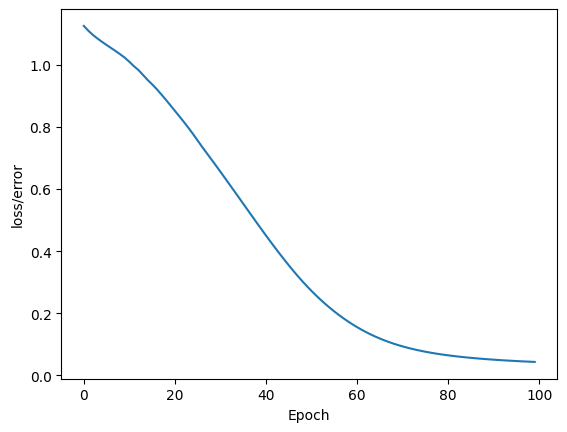

In [47]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [48]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(x_test) # x_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test)# Find the loss or error
  print(loss)

tensor(0.1295)


In [50]:

correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t{x} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([0.0000, 7.4447, 9.9152]) 	Virginica 	 2 	 2
2.)  tensor([ 0.0000,  7.7042, 14.3743]) 	Virginica 	 2 	 2
3.)  tensor([ 0.0000,  9.1280, 15.1753]) 	Virginica 	 2 	 2
4.)  tensor([0.2102, 8.3280, 4.5364]) 	Versicolor 	 1 	 1
5.)  tensor([ 0.0000,  8.4035, 12.4779]) 	Virginica 	 2 	 2
6.)  tensor([1.6255, 8.0527, 1.9799]) 	Versicolor 	 1 	 1
7.)  tensor([0.0000, 8.0659, 9.2757]) 	Virginica 	 2 	 2
8.)  tensor([0.3294, 8.4105, 4.3070]) 	Versicolor 	 1 	 1
9.)  tensor([ 0.0000,  8.2367, 10.8423]) 	Virginica 	 2 	 2
10.)  tensor([ 0.0000,  8.1941, 15.2505]) 	Virginica 	 2 	 2
11.)  tensor([0.0000, 7.9806, 8.7350]) 	Virginica 	 2 	 2
12.)  tensor([8.9715, 3.4637, 0.0000]) 	Setosa 	 0 	 0
13.)  tensor([8.0554, 3.1741, 0.0000]) 	Setosa 	 0 	 0
14.)  tensor([2.2377, 6.4805, 0.4353]) 	Versicolor 	 1 	 1
15.)  tensor([8.0202, 3.9148, 0.0000]) 	Setosa 	 0 	 0
16.)  tensor([0.0000, 8.1254, 8.0101]) 	Virginica 	 2 	 1
17.)  tensor([8.3626, 3.3009, 0.0000]) 	Setosa 	 0 	 0
18.)  tensor([0.

In [51]:
#Evaluate NEW Data On The Network
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [52]:
with torch.no_grad():
  print(model(new_iris))

tensor([8.5193, 3.3207, 0.0000])


In [53]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [54]:

with torch.no_grad():
  print(model(newer_iris))
     

tensor([ 0.0000,  7.5979, 10.1487])


In [55]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [56]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [57]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)